## Dependencies and starter code

In [28]:
#Conclusions
#1) A heavier mouse will, on average, have a larger tumor than a smaller mouse.
#2) Capomulin and Ramicane seem to be the most promising drug regimen overall, both consistently showing
# a decrease in tumor volume and smaller tumors on average by the end of the regimen. They are also the drug regimen
# with the highest total data points
#3) the gender distribution of mice tested was very close to 50/50, so the data was not skewed to one gender or another

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
full_data = pd.merge(mouse_metadata, study_results, on="Mouse ID") 

## Summary statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
full_data["Tumor Volume (mm3)"].describe()

#calculate each value we're interested in for each drug regimen
mean = full_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = full_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = full_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = full_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = full_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drugRegimen = full_data["Drug Regimen"].value_counts().keys().tolist() #names of each drug regimen to use as index, 
#and for other calculations later as well

#put the values found earlier into a dataframe to display it
summaryStatisticsDF = pd.DataFrame({ 
    "mean": mean,
    "median": median,
    "variance": variance,
    "standard deviation": std,
    "Standard Error of the Mean (SEM)": SEM},
    index = drugRegimen
) 
summaryStatisticsDF.index.name = "Drug Regimen"
summaryStatisticsDF.head(20)

,mean,median,variance,standard deviation,Standard Error of the Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821


## Bar plots

Text(0, 0.5, 'Data Points')

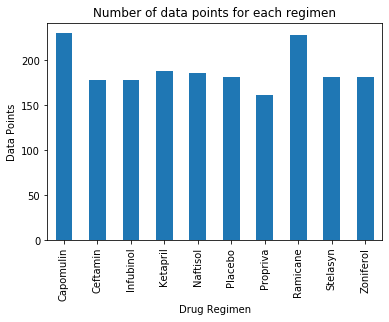

In [30]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas 
regimenPlot = full_data.groupby("Drug Regimen")["Sex"].count().plot.bar(title = "Number of data points for each regimen") #plot the number of occurances of each drug regimen
regimenPlot.set_ylabel("Data Points")

Text(0, 0.5, 'Data Points')

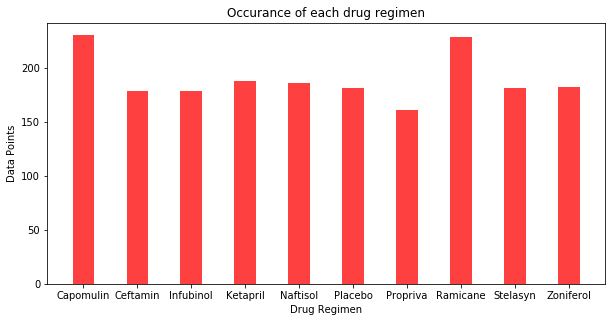

In [31]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x1 = range(len(drugRegimen))
x_axis = [2*i for i in x1] #space bars out a bit more/make bars smaller

plt.figure(figsize=(10, 4.8)) #resize figure to make the x-axis labels readable, otherwise they overlap

plt.bar(x_axis, full_data.groupby("Drug Regimen")["Sex"].count(), facecolor="red", alpha=0.75, align="center")
plt.xticks(x_axis, sorted(drugRegimen)) 

plt.title("Occurance of each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie plots

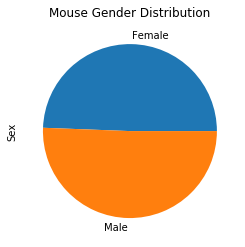

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderPlot = full_data.groupby("Sex")["Sex"].count().plot.pie(title = "Mouse Gender Distribution")

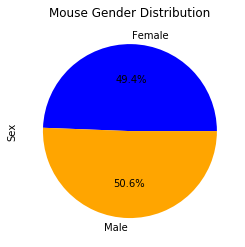

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "orange"] #color the pie chart like the previous one, or at least similar to it
labels = ["Female","Male"] #ORDER MATTERS - if the order doesn't match the order of the data passed, it will mislabel it
#Since groupby we're using goes by alphabetical order, that means female goes first

plt.title("Mouse Gender Distribution")
plt.pie(full_data.groupby("Sex")["Mouse ID"].count(), labels=labels, colors=colors, autopct="%1.1f%%") 
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [34]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

regimen1 = full_data.loc[full_data['Drug Regimen'].isin(["Capomulin"])] #new dataframes to only have a single drug regimen included
regimen2 = full_data.loc[full_data['Drug Regimen'].isin(["Ramicane"])]
regimen3 = full_data.loc[full_data['Drug Regimen'].isin(["Infubinol"])]
regimen4 = full_data.loc[full_data['Drug Regimen'].isin(["Ceftamin"])]

mousedatapoints1 = regimen1.groupby("Mouse ID")#group the regimen dfs by mouse ID
mousedatapoints2 = regimen2.groupby("Mouse ID")
mousedatapoints3 = regimen3.groupby("Mouse ID")
mousedatapoints4 = regimen4.groupby("Mouse ID")

#create a dataframe of each mouse's final tumor volume for use with the following calculations
finalTumorDF = pd.DataFrame({ 
    "Capomulin": full_data.loc[mousedatapoints1['Timepoint'].idxmax()]["Tumor Volume (mm3)"],
    "Ramicane": full_data.loc[mousedatapoints2['Timepoint'].idxmax()]["Tumor Volume (mm3)"],
    "Infubinol": full_data.loc[mousedatapoints3['Timepoint'].idxmax()]["Tumor Volume (mm3)"],
    "Ceftamin": full_data.loc[mousedatapoints4['Timepoint'].idxmax()]["Tumor Volume (mm3)"]}
) 
#IQRs for each drug regimen
IQR1 = (finalTumorDF["Capomulin"].quantile(0.75) - finalTumorDF["Capomulin"].quantile(0.25)) 
IQR2 = (finalTumorDF["Ramicane"].quantile(0.75) - finalTumorDF["Ramicane"].quantile(0.25))
IQR3 = (finalTumorDF["Infubinol"].quantile(0.75) - finalTumorDF["Infubinol"].quantile(0.25))
IQR4 = (finalTumorDF["Ceftamin"].quantile(0.75) - finalTumorDF["Ceftamin"].quantile(0.25))

#df for outliers above Q3
s1 = finalTumorDF[finalTumorDF["Capomulin"]  > (finalTumorDF["Capomulin"].quantile(0.75) + 1.5 * IQR1)] 
#df for outliers below Q1
s2 = finalTumorDF[finalTumorDF["Capomulin"]  < (finalTumorDF["Capomulin"].quantile(0.25) - 1.5 * IQR1)] 
CapomulinOutliers = pd.concat([s1,s2])["Capomulin"].values.tolist() #create list of all outliers

#repeat creating the outliers DF for all regimen
s1 = finalTumorDF[finalTumorDF["Ramicane"]  > (finalTumorDF["Ramicane"].quantile(0.75) + 1.5 * IQR2)]
s2 = finalTumorDF[finalTumorDF["Ramicane"]  < (finalTumorDF["Ramicane"].quantile(0.25) - 1.5 * IQR2)]
RamicaneOutliers = pd.concat([s1,s2])["Ramicane"].values.tolist()

s1 = finalTumorDF[finalTumorDF["Infubinol"]  > (finalTumorDF["Infubinol"].quantile(0.75) + 1.5 * IQR3)]
s2 = finalTumorDF[finalTumorDF["Infubinol"]  < (finalTumorDF["Infubinol"].quantile(0.25) - 1.5 * IQR3)]
InfubinolOutliers = pd.concat([s1,s2])["Infubinol"].values.tolist()

s1 = finalTumorDF[finalTumorDF["Ceftamin"]  > (finalTumorDF["Ceftamin"].quantile(0.75) + 1.5 * IQR4)]
s2 = finalTumorDF[finalTumorDF["Ceftamin"]  < (finalTumorDF["Ceftamin"].quantile(0.25) - 1.5 * IQR4)]
CeftaminOutliers = pd.concat([s1,s2])["Ceftamin"].values.tolist()

#report outliers for each regimen, and note if there are no outliers
if not CapomulinOutliers:
    print('Capomulin has no outliers')
else:
    print("Capomulin Outliers: ")
    print(CapomulinOutliers)
if not RamicaneOutliers:
    print('Ramicane has no outliers')
else:
    print("Ramicane Outliers: ")
    print(RamicaneOutliers)
if not InfubinolOutliers:
    print('Ifubinol has no outliers')
else:
    print("Ifubinol Outliers: ")
    print(InfubinolOutliers)
if not CeftaminOutliers:
    print('Ceftamin has no outliers')
else:
    print("Ceftamin Outliers: ")
    print(CeftaminOutliers)

Capomulin has no outliers
Ramicane has no outliers
Ifubinol Outliers: 
[36.321345799999996]
Ceftamin has no outliers


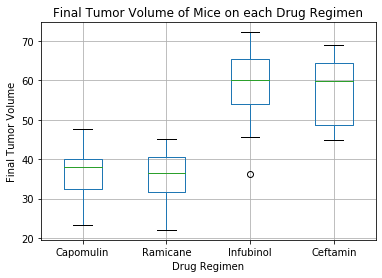

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

regimenBoxPlots = finalTumorDF.boxplot(column=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.title("Final Tumor Volume of Mice on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and scatter plots

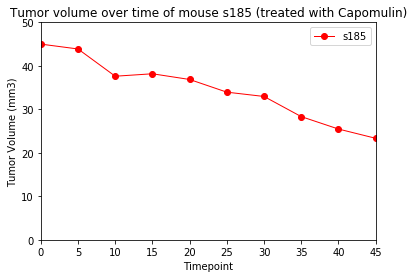

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185 = full_data.loc[full_data['Mouse ID'].isin(["s185"])] #select the mouse to plot

plt.title("Tumor volume over time of mouse s185 (treated with Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(0, 45)
plt.ylim(0, 50)

plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"], marker="o", color="red", linewidth=1, label = "s185") 
plt.legend(loc="best")
plt.show()

The correlation coefficient between weight and average tumor volume on the Capomulin Regimen is 0.84


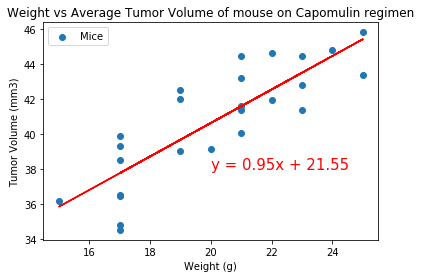

In [41]:
# Generate a scatter plot of mouse weight versus -average tumor volume- for the Capomulin regimen

#get a single weight value for each mouse
#every mouse stays the same weight, I tested this to confirm, so any weight value will do as long as each mouse has one
x_values = full_data.loc[mousedatapoints1['Timepoint'].idxmax()]["Weight (g)"] 
#get the average tumor volume for each mouse
y_values = mousedatapoints1["Tumor Volume (mm3)"].mean() 

plt.scatter(x_values,y_values,label="Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume of mouse on Capomulin regimen")
plt.legend(loc="best")

# Calculate the correlation coefficient and linear regression model for mouse weight and 
# average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")

print(f"The correlation coefficient between weight and average tumor volume on the Capomulin Regimen is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()